In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CLEANING SEGMENT LIST**

In [ ]:
SegmentList = pd.read_excel("/content/drive/MyDrive/Account+List+with+Segment.xlsx")

In [ ]:
SegmentList = SegmentList.iloc[5:]

In [ ]:
SegmentList.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
5,Record Id,Account Name,Client Segment Type,Account Owner
6,zcrm_4508063000109315008,Shoptology,Automater,Whitney Giordano
7,zcrm_4508063000094477806,Ironwood Insights Group,Automater,Bud Conner
8,zcrm_4508063000087278239,Finch Brands,Automater,Courtney Hocking
9,zcrm_4508063000049301099,Marcus Thomas LLC,Automater,Courtney Hocking


In [ ]:
SegmentList.columns = SegmentList.iloc[0]
SegmentList = SegmentList[1:]
SegmentList.head()

5,Record Id,Account Name,Client Segment Type,Account Owner
6,zcrm_4508063000109315008,Shoptology,Automater,Whitney Giordano
7,zcrm_4508063000094477806,Ironwood Insights Group,Automater,Bud Conner
8,zcrm_4508063000087278239,Finch Brands,Automater,Courtney Hocking
9,zcrm_4508063000049301099,Marcus Thomas LLC,Automater,Courtney Hocking
10,zcrm_4508063000019791917,Stormy Lake Consulting,Automater,Courtney Hocking


In [ ]:
SegmentList.describe()

5,Record Id,Account Name,Client Segment Type,Account Owner
count,153,153,153,153
unique,153,153,4,7
top,zcrm_4508063000109315008,Shoptology,One Stop Shopper,Courtney Hocking
freq,1,1,71,39


In [ ]:
SegmentList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 6 to 158
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Record Id            153 non-null    object
 1   Account Name         153 non-null    object
 2   Client Segment Type  153 non-null    object
 3   Account Owner        153 non-null    object
dtypes: object(4)
memory usage: 4.9+ KB


In [ ]:
SegmentList.to_csv('SegmentList.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('SegmentList.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **CLEANING LOST BIDS**

In [ ]:
LostTrsct = pd.read_excel("/content/drive/MyDrive/Deal+Item+Report+LOST.xlsx")

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
LostTrsct.head()

,Record Id,Record Id (Items),Item,Description (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount
0,zcrm_4508063000171830097,zcrm_4508063000171830098,Sample,CA,50.0,8.0,20.0,35.0,1750.0,APPD RoW 2025,Management Insight Technologies,22140.0
1,zcrm_4508063000171830097,zcrm_4508063000171830099,Sample,MX,20.0,4.0,20.0,40.0,800.0,APPD RoW 2025,Management Insight Technologies,22140.0
2,zcrm_4508063000171830097,zcrm_4508063000171830100,Sample,Argentina,40.0,2.0,20.0,42.0,1680.0,APPD RoW 2025,Management Insight Technologies,22140.0
3,zcrm_4508063000171830097,zcrm_4508063000171830101,Sample,Chile,10.0,5.0,20.0,40.0,400.0,APPD RoW 2025,Management Insight Technologies,22140.0
4,zcrm_4508063000171830097,zcrm_4508063000171830102,Sample,Peru,15.0,2.0,20.0,40.0,600.0,APPD RoW 2025,Management Insight Technologies,22140.0


In [ ]:
LostTrsct.describe()

,Qty,IR,LOI,Customer Rate,Item Amount,Amount
count,3.372000e+03,2661.000000,2671.000000,3373.000000,3391.000000,3352.000000
mean,3.689253e+03,38.111612,15.708349,392.224786,9185.156576,23963.873523
std,1.722323e+05,30.682413,6.345301,1647.652638,19686.389951,39193.169087
min,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.500000e+01,20.000000,12.000000,6.750000,1405.000000,5300.000000
50%,2.250000e+02,30.000000,15.000000,31.000000,3800.000000,12000.000000
75%,7.000000e+02,56.000000,20.000000,90.000000,9387.500000,25150.000000
max,1.000000e+07,1000.000000,158.000000,52375.000000,555672.000000,829712.000000


In [ ]:
LostTrsct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            3492 non-null   object 
 1   Record Id (Items)    3391 non-null   object 
 2   Item                 3390 non-null   object 
 3   Description (Items)  2286 non-null   object 
 4   Qty                  3372 non-null   float64
 5   IR                   2661 non-null   float64
 6   LOI                  2671 non-null   float64
 7   Customer Rate        3373 non-null   float64
 8   Item Amount          3391 non-null   float64
 9   Deal Name            3492 non-null   object 
 10  Account Name         3492 non-null   object 
 11  Amount               3352 non-null   float64
dtypes: float64(6), object(6)
memory usage: 327.5+ KB


In [ ]:
LostTrsct = LostTrsct[LostTrsct['Item'] == 'Sample']

In [ ]:
LostTrsct.head()

,Record Id,Record Id (Items),Item,Description (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount
0,zcrm_4508063000171830097,zcrm_4508063000171830098,Sample,CA,50.0,8.0,20.0,35.0,1750.0,APPD RoW 2025,Management Insight Technologies,22140.0
1,zcrm_4508063000171830097,zcrm_4508063000171830099,Sample,MX,20.0,4.0,20.0,40.0,800.0,APPD RoW 2025,Management Insight Technologies,22140.0
2,zcrm_4508063000171830097,zcrm_4508063000171830100,Sample,Argentina,40.0,2.0,20.0,42.0,1680.0,APPD RoW 2025,Management Insight Technologies,22140.0
3,zcrm_4508063000171830097,zcrm_4508063000171830101,Sample,Chile,10.0,5.0,20.0,40.0,400.0,APPD RoW 2025,Management Insight Technologies,22140.0
4,zcrm_4508063000171830097,zcrm_4508063000171830102,Sample,Peru,15.0,2.0,20.0,40.0,600.0,APPD RoW 2025,Management Insight Technologies,22140.0


In [ ]:
import pandas as pd

# Subset of the DataFrame containing only numeric columns
num_df = LostTrsct.select_dtypes(include='number')

# Identify which numeric columns have null values
cols_with_nulls = num_df.columns[num_df.isnull().any()]

# Replace nulls in each numeric column with that column's median
for col in cols_with_nulls:
    median_val = LostTrsct[col].median()
    LostTrsct[col].fillna(median_val, inplace=True)

# (Optional) Verify the changes
print(LostTrsct.info())
print(LostTrsct.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2693 entries, 0 to 3490
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            2693 non-null   object 
 1   Record Id (Items)    2693 non-null   object 
 2   Item                 2693 non-null   object 
 3   Description (Items)  2022 non-null   object 
 4   Qty                  2693 non-null   float64
 5   IR                   2693 non-null   float64
 6   LOI                  2693 non-null   float64
 7   Customer Rate        2693 non-null   float64
 8   Item Amount          2693 non-null   float64
 9   Deal Name            2693 non-null   object 
 10  Account Name         2693 non-null   object 
 11  Amount               2693 non-null   float64
dtypes: float64(6), object(6)
memory usage: 273.5+ KB
None
Record Id                0
Record Id (Items)        0
Item                     0
Description (Items)    671
Qty                      0
IR  

<ipython-input-27-ff023625de69>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  LostTrsct[col].fillna(median_val, inplace=True)
<ipython-input-27-ff023625de69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LostTrsct[col].fillna(median_val, inplace=True)


In [ ]:
LostTrsct = LostTrsct.drop(columns=['Item','Description (Items)'])
LostTrsct.head()

,Record Id,Record Id (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount
0,zcrm_4508063000171830097,zcrm_4508063000171830098,50.0,8.0,20.0,35.0,1750.0,APPD RoW 2025,Management Insight Technologies,22140.0
1,zcrm_4508063000171830097,zcrm_4508063000171830099,20.0,4.0,20.0,40.0,800.0,APPD RoW 2025,Management Insight Technologies,22140.0
2,zcrm_4508063000171830097,zcrm_4508063000171830100,40.0,2.0,20.0,42.0,1680.0,APPD RoW 2025,Management Insight Technologies,22140.0
3,zcrm_4508063000171830097,zcrm_4508063000171830101,10.0,5.0,20.0,40.0,400.0,APPD RoW 2025,Management Insight Technologies,22140.0
4,zcrm_4508063000171830097,zcrm_4508063000171830102,15.0,2.0,20.0,40.0,600.0,APPD RoW 2025,Management Insight Technologies,22140.0


In [ ]:
# Count unique "Deal Name" and "Account Name"
unique_deal_names = LostTrsct['Deal Name'].nunique()
unique_account_names = LostTrsct['Account Name'].nunique()

print(f"Number of unique Deal Names: {unique_deal_names}")
print(f"Number of unique Account Names: {unique_account_names}")

# List unique "Deal Name"
print("\nUnique Deal Names:")
print(LostTrsct['Deal Name'].unique())

# List unique "Account Name"
print("\nUnique Account Names:")
print(LostTrsct['Account Name'].unique())


Number of unique Deal Names: 1769
Number of unique Account Names: 149

Unique Deal Names:
['APPD RoW 2025' 'Monthly Gen Pop - February - Wave'
 '5772_PROJECT BID: FEB 2025 Chronic Kidney Disease sufferers for continuous monthly tracker (Jardiance)'
 ... 'PR150699 - International market place' 'Commercial Printing -'
 'Multivitamins']

Unique Account Names:
['Management Insight Technologies' 'Inspired Insight' 'Comscore'
 'Radius Global Market Research' 'TRC Market Research' 'PARAGRAPH Project'
 'Altman Solon' 'Human8' 'Kadence International' 'Digital Research, Inc.'
 'Grey Matter Research & Consulting LLC' 'HarrisX' 'J.D. Power'
 'Illuminas Global' 'Sparketing' 'Branding Science Group'
 'Harris Insights & Analytics' 'Ironwood Insights Group' 'RTi Research'
 'AMG Research' 'Facet Squared' 'Global Strategy Group, LLC'
 'The Cambridge Group' 'Alter Agents' 'Emerald Research Group, LLC'
 'Brookmark Research Services, LLC' 'Chadwick Martin Bailey' 'Opinium'
 'MarketVision Research' 'Escalen

In [ ]:
# Calculate target encoding for 'Deal Name'
deal_target_encoding = LostTrsct.groupby('Deal Name')['Amount'].mean()
LostTrsct['Deal_Target_Encoded'] = LostTrsct['Deal Name'].map(deal_target_encoding)

# Calculate target encoding for 'Account Name'
account_target_encoding = LostTrsct.groupby('Account Name')['Amount'].mean()
LostTrsct['Account_Target_Encoded'] = LostTrsct['Account Name'].map(account_target_encoding)

# Display the updated DataFrame with target encoded columns
print(LostTrsct.head())


                  Record Id         Record Id (Items)   Qty   IR   LOI  \
0  zcrm_4508063000171830097  zcrm_4508063000171830098  50.0  8.0  20.0   
1  zcrm_4508063000171830097  zcrm_4508063000171830099  20.0  4.0  20.0   
2  zcrm_4508063000171830097  zcrm_4508063000171830100  40.0  2.0  20.0   
3  zcrm_4508063000171830097  zcrm_4508063000171830101  10.0  5.0  20.0   
4  zcrm_4508063000171830097  zcrm_4508063000171830102  15.0  2.0  20.0   

   Customer Rate  Item Amount      Deal Name                     Account Name  \
0           35.0       1750.0  APPD RoW 2025  Management Insight Technologies   
1           40.0        800.0  APPD RoW 2025  Management Insight Technologies   
2           42.0       1680.0  APPD RoW 2025  Management Insight Technologies   
3           40.0        400.0  APPD RoW 2025  Management Insight Technologies   
4           40.0        600.0  APPD RoW 2025  Management Insight Technologies   

    Amount  Deal_Target_Encoded  Account_Target_Encoded  
0  22140.0

In [ ]:
LostTrsct = LostTrsct.drop(columns=['Deal Name', 'Account Name'])
LostTrsct.head()

,Record Id,Record Id (Items),Qty,IR,LOI,Customer Rate,Item Amount,Amount,Deal_Target_Encoded,Account_Target_Encoded
0,zcrm_4508063000171830097,zcrm_4508063000171830098,50.0,8.0,20.0,35.0,1750.0,22140.0,22140.0,21634.736842
1,zcrm_4508063000171830097,zcrm_4508063000171830099,20.0,4.0,20.0,40.0,800.0,22140.0,22140.0,21634.736842
2,zcrm_4508063000171830097,zcrm_4508063000171830100,40.0,2.0,20.0,42.0,1680.0,22140.0,22140.0,21634.736842
3,zcrm_4508063000171830097,zcrm_4508063000171830101,10.0,5.0,20.0,40.0,400.0,22140.0,22140.0,21634.736842
4,zcrm_4508063000171830097,zcrm_4508063000171830102,15.0,2.0,20.0,40.0,600.0,22140.0,22140.0,21634.736842


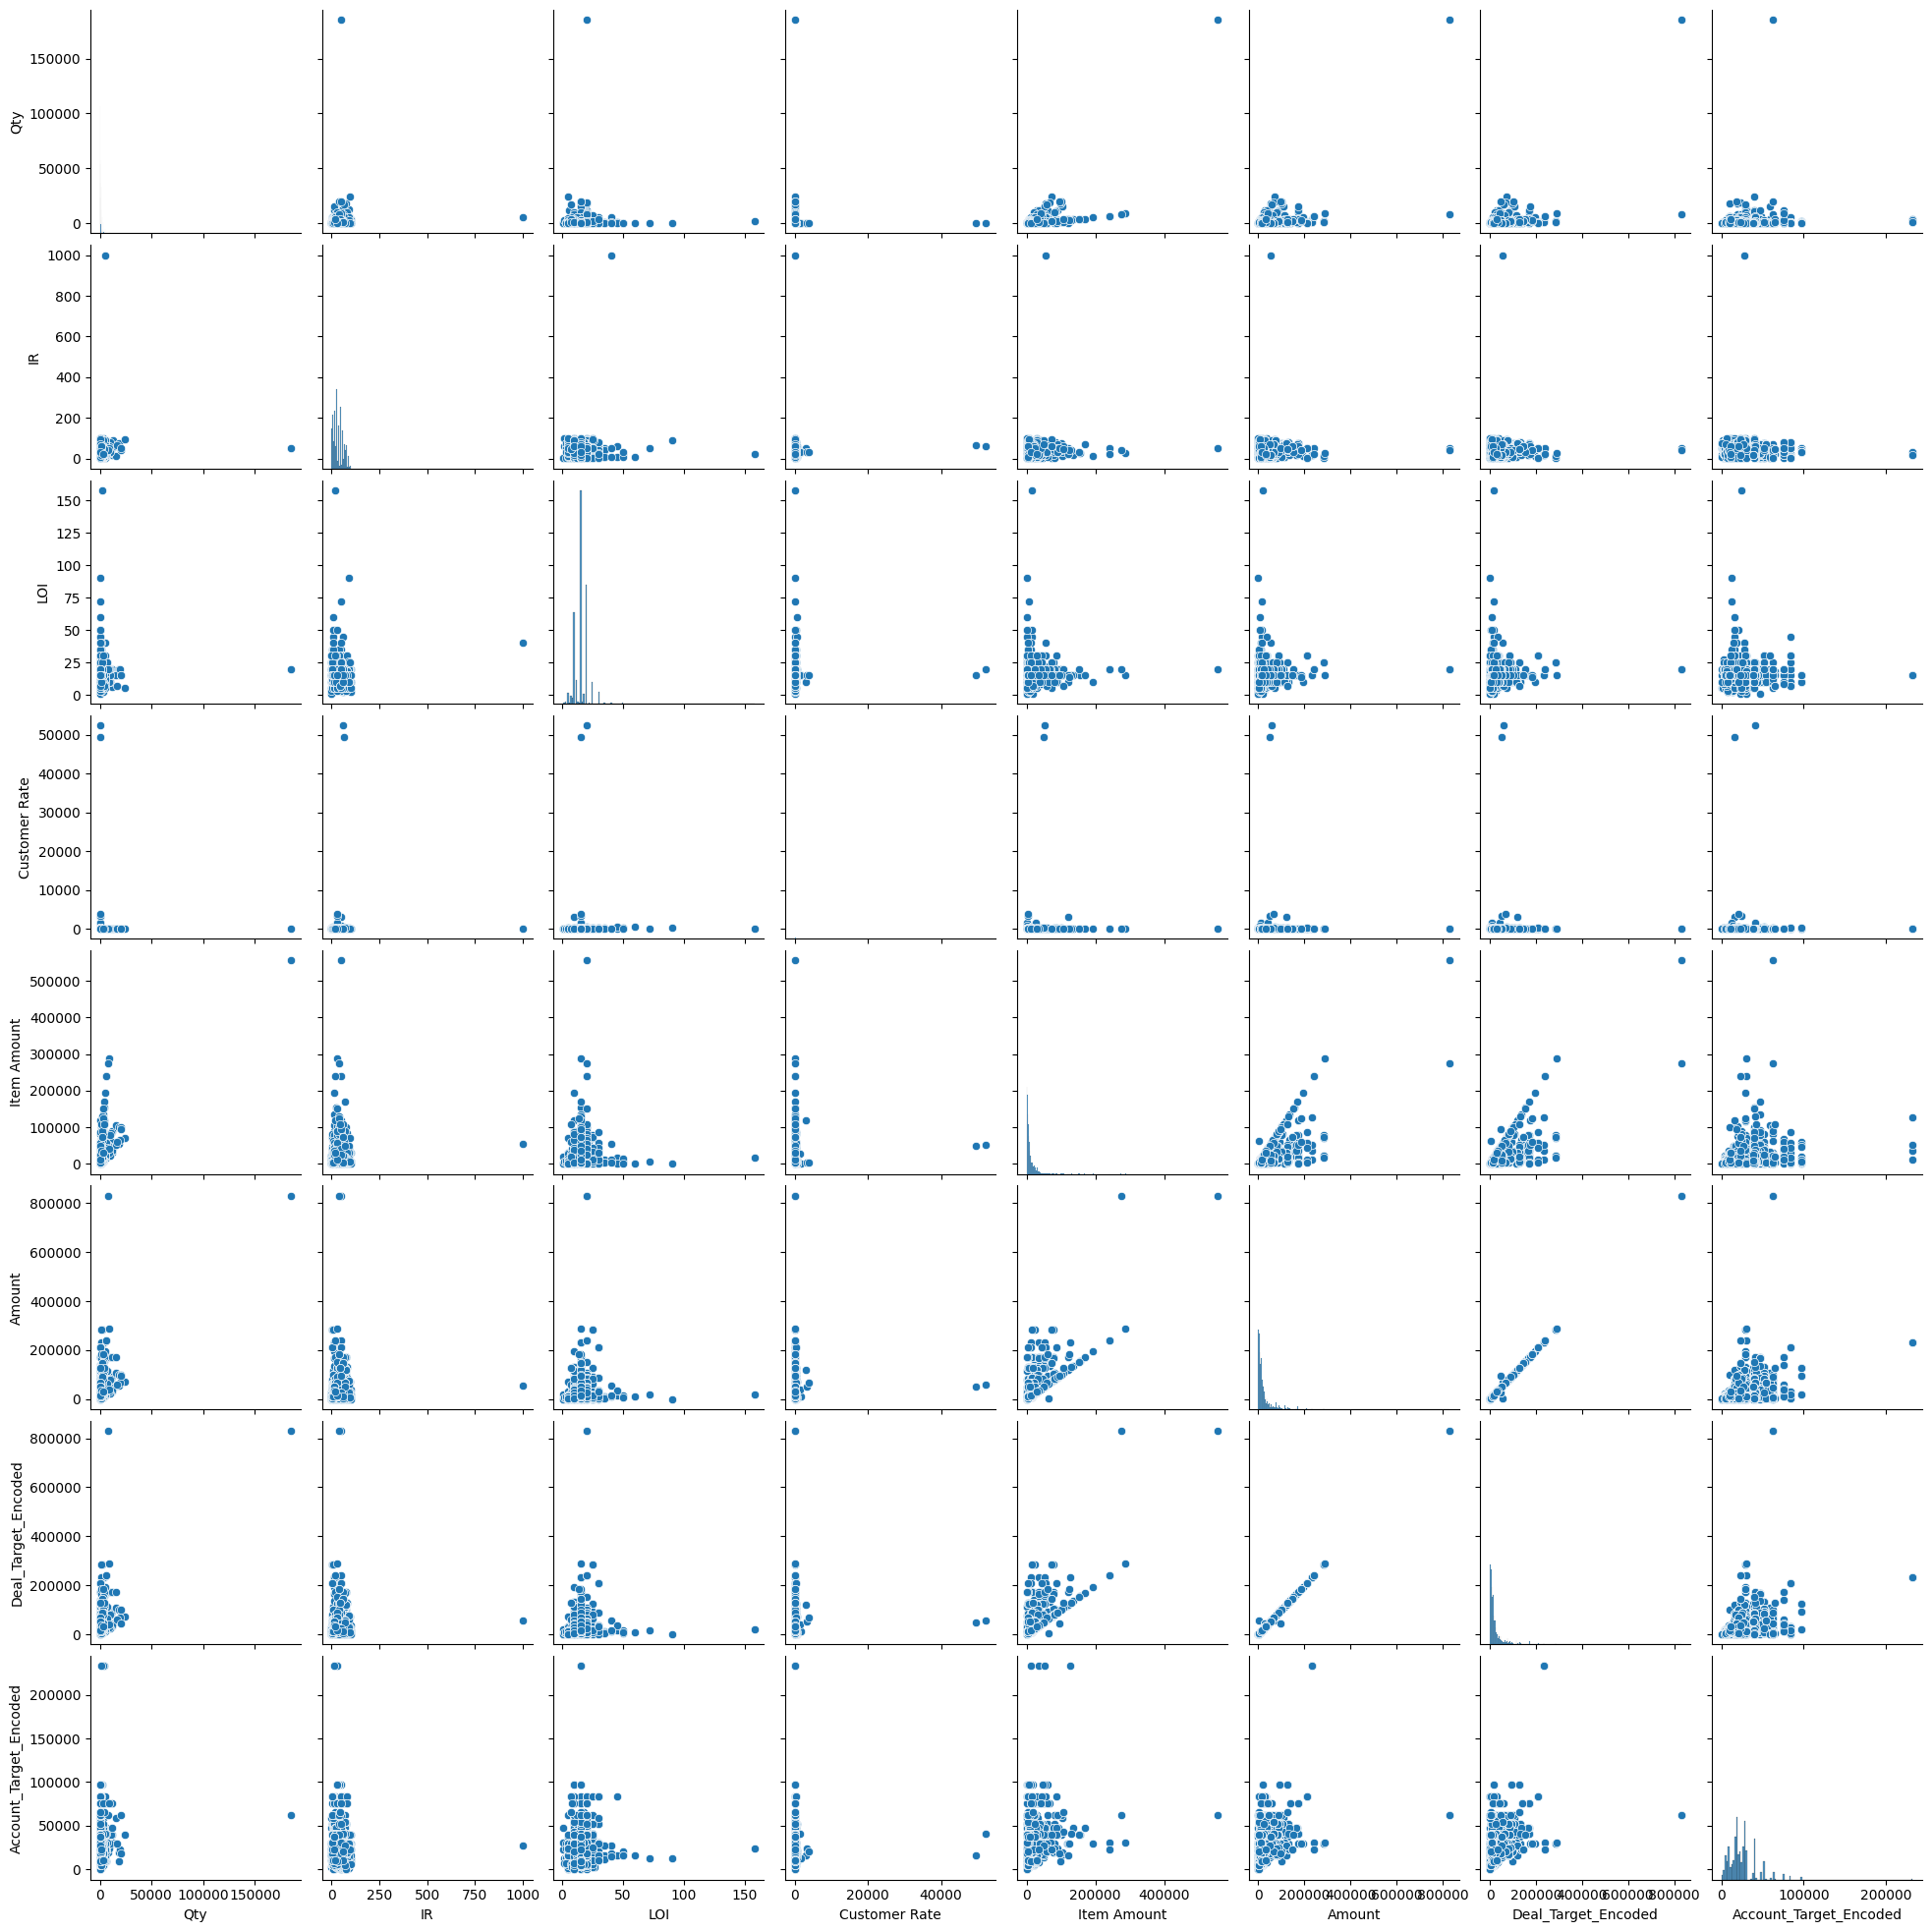

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(LostTrsct)
plt.show()


In [ ]:
LostTrsctNum = LostTrsct.drop(columns=['Record Id', 'Record Id (Items)'])
print(LostTrsctNum.head())


    Qty   IR   LOI  Customer Rate  Item Amount   Amount  Deal_Target_Encoded  \
0  50.0  8.0  20.0           35.0       1750.0  22140.0              22140.0   
1  20.0  4.0  20.0           40.0        800.0  22140.0              22140.0   
2  40.0  2.0  20.0           42.0       1680.0  22140.0              22140.0   
3  10.0  5.0  20.0           40.0        400.0  22140.0              22140.0   
4  15.0  2.0  20.0           40.0        600.0  22140.0              22140.0   

   Account_Target_Encoded  
0            21634.736842  
1            21634.736842  
2            21634.736842  
3            21634.736842  
4            21634.736842  


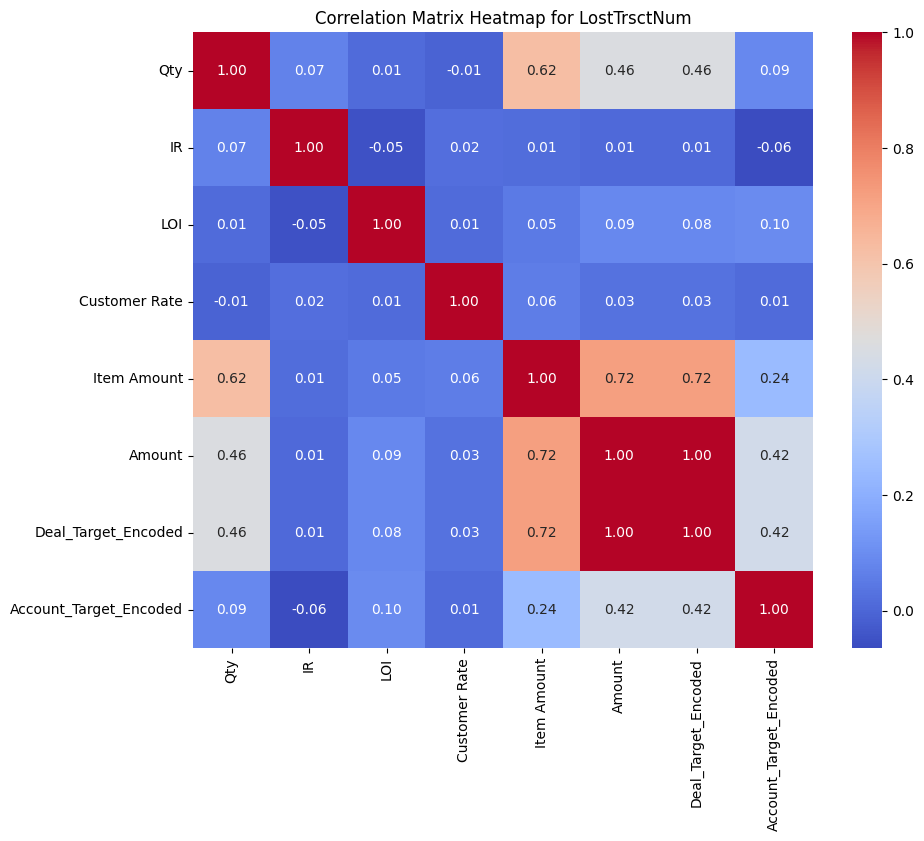

In [ ]:
# Calculate the correlation matrix
correlation_matrix = LostTrsctNum.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for LostTrsctNum')
plt.show()


In [ ]:
LostTrsct.to_csv('LostTrsct.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('LostTrsct.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **CLEANING INVOICED JOBS DATASET**

In [ ]:
InvTrsct=pd.read_excel("/content/drive/MyDrive/invoiced_jobs_this_year_2024-09-12T18_36_36.439126Z.xlsx")

In [ ]:
InvTrsct.head()

,Project Code Child,Project Code Parent,Project Name,Project Manager,Project Status,Service Type,Invoiced Date,Actual Project Revenue,Vendor Cost ($),Client Name,Category,Complete,CPI,Actual Ir,Actual Loi,Project Tags,Countries,Audience
0,NAV19748-01,19748,Employee survey,Daniel Mitchell,Invoiced,FullService,2024-03-31,3150.0,0.0,Paramount Global,Consumer,0,NaN,NaN,0.000000,NaN,[],NaN
1,NAV20763-01,20763,24-000851-01,Bryce Smith,Invoiced,SampleOnly,2024-05-09,500.0,0.0,Ipsos Interactive Services US,Consumer,0,NaN,0.0,0.000000,NaN,"[""Switzerland""]","Parents,Geo"
2,NAV20092-01,20092,HBS008,Daniel Mitchell,Invoiced,Not Labeled,2024-06-30,3290.0,1000.0,Helical Research,Consumer,0,NaN,NaN,0.000000,NaN,[],NaN
3,NAV21259-01,21259,NOLA Consumer Healthcare Study,Bryce Smith,Invoiced,SampleOnly,2024-07-10,400.0,0.0,"ROIRocket.com, LLC",Consumer,0,NaN,0.0,0.000000,NaN,[],NaN
4,NAV17857-02,17857,Roku IR check,Kelley Ghattas,Invoiced,FullService,2024-04-30,0.0,0.0,Alter Agents,Consumer,225,0.0,100.0,0.778614,NaN,"[""United States""]",NaN


In [ ]:
InvTrsct.describe()

,Project Code Parent,Invoiced Date,Actual Project Revenue,Vendor Cost ($),Complete,CPI,Actual Ir,Actual Loi
count,676.000000,676,676.000000,676.000000,676.000000,672.000000,674.000000,676.000000
mean,20211.202663,2024-05-13 21:26:37.633136128,5265.105944,2230.922354,774.356509,13.316975,34.186951,335.408968
min,16826.000000,2024-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19645.500000,2024-03-25 18:00:00,1394.437500,529.350739,104.750000,5.250000,10.794758,9.744507
50%,20231.000000,2024-05-09 00:00:00,3300.000000,1421.250000,351.000000,8.000000,22.814766,14.315405
75%,20943.250000,2024-06-30 00:00:00,6669.250000,2748.974976,1000.000000,15.000000,52.714818,18.516040
max,21786.000000,2024-09-11 00:00:00,67600.000000,50496.101562,25999.000000,128.843750,100.000000,216543.889160
std,921.962304,NaN,7005.461936,3551.703627,1588.496453,16.569514,29.776968,8328.033640


In [ ]:
InvTrsct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Project Code Child      676 non-null    object        
 1   Project Code Parent     676 non-null    int64         
 2   Project Name            676 non-null    object        
 3   Project Manager         676 non-null    object        
 4   Project Status          676 non-null    object        
 5   Service Type            676 non-null    object        
 6   Invoiced Date           676 non-null    datetime64[ns]
 7   Actual Project Revenue  676 non-null    float64       
 8   Vendor Cost ($)         676 non-null    float64       
 9   Client Name             676 non-null    object        
 10  Category                676 non-null    object        
 11  Complete                676 non-null    int64         
 12  CPI                     672 non-null    float64   

In [ ]:
# Replace null values in 'Audience' column with empty strings
InvTrsct['Audience'] = InvTrsct['Audience'].fillna("")


In [ ]:
# Replace null values in 'Project Tags' column with empty strings
InvTrsct['Project Tags'] = InvTrsct['Project Tags'].fillna("")


In [ ]:
InvTrsct.head()

,Project Code Child,Project Code Parent,Project Name,Project Manager,Project Status,Service Type,Invoiced Date,Actual Project Revenue,Vendor Cost ($),Client Name,Category,Complete,CPI,Actual Ir,Actual Loi,Project Tags,Countries,Audience
0,NAV19748-01,19748,Employee survey,Daniel Mitchell,Invoiced,FullService,2024-03-31,3150.0,0.0,Paramount Global,Consumer,0,NaN,NaN,0.000000,,[],
1,NAV20763-01,20763,24-000851-01,Bryce Smith,Invoiced,SampleOnly,2024-05-09,500.0,0.0,Ipsos Interactive Services US,Consumer,0,NaN,0.0,0.000000,,"[""Switzerland""]","Parents,Geo"
2,NAV20092-01,20092,HBS008,Daniel Mitchell,Invoiced,Not Labeled,2024-06-30,3290.0,1000.0,Helical Research,Consumer,0,NaN,NaN,0.000000,,[],
3,NAV21259-01,21259,NOLA Consumer Healthcare Study,Bryce Smith,Invoiced,SampleOnly,2024-07-10,400.0,0.0,"ROIRocket.com, LLC",Consumer,0,NaN,0.0,0.000000,,[],
4,NAV17857-02,17857,Roku IR check,Kelley Ghattas,Invoiced,FullService,2024-04-30,0.0,0.0,Alter Agents,Consumer,225,0.0,100.0,0.778614,,"[""United States""]",


In [ ]:
unique_countries = InvTrsct['Countries'].unique()
unique_countries

array(['[]', '["Switzerland"]', '["United States"]', '["Japan"]',
       '["United Kingdom"]', '["Netherlands"]', '["Germany"]',
       '["Belgium"]',
       '["Canada","Australia","Argentina","Brazil","Mexico"]',
       '["France"]', '["Australia"]', '["Spain"]', '["Canada"]',
       '["Italy"]', '["South Korea"]', '["Portugal"]', '["Indonesia"]',
       '["Kuwait"]', '["Mexico"]', '["Brazil"]', '["Greece"]',
       '["Norway"]', '["South Africa"]', '["China"]', '["Argentina"]',
       '["Viet Nam"]', '["Saudi Arabia"]', '["Hong Kong"]', '["India"]',
       '["United Arab Emirates"]', '["Puerto Rico"]', '["Nigeria"]',
       '["Chile"]', '["Colombia"]'], dtype=object)

In [ ]:
# Replace ["Hong Kong"] with ["China"] in the 'Countries' column
InvTrsct['Countries'] = InvTrsct['Countries'].apply(lambda x: '["China"]' if x == '["Hong Kong"]' else x)

# Replace ["Puerto Rico"] with ["United States"] in the 'Countries' column
InvTrsct['Countries'] = InvTrsct['Countries'].apply(lambda x: '["United States"]' if x == '["Puerto Rico"]' else x)


In [ ]:
unique_countries = InvTrsct['Countries'].unique()
unique_countries

array(['[]', '["Switzerland"]', '["United States"]', '["Japan"]',
       '["United Kingdom"]', '["Netherlands"]', '["Germany"]',
       '["Belgium"]',
       '["Canada","Australia","Argentina","Brazil","Mexico"]',
       '["France"]', '["Australia"]', '["Spain"]', '["Canada"]',
       '["Italy"]', '["South Korea"]', '["Portugal"]', '["Indonesia"]',
       '["Kuwait"]', '["Mexico"]', '["Brazil"]', '["Greece"]',
       '["Norway"]', '["South Africa"]', '["China"]', '["Argentina"]',
       '["Viet Nam"]', '["Saudi Arabia"]', '["India"]',
       '["United Arab Emirates"]', '["Nigeria"]', '["Chile"]',
       '["Colombia"]'], dtype=object)

In [ ]:
# Calculate the mean Vendor Cost for each country
country_vendor_cost_mapping = InvTrsct.groupby('Countries')['Vendor Cost ($)'].mean()

# Create a new column with the target encoded values
InvTrsct['Countries_Target_Encoded'] = InvTrsct['Countries'].map(country_vendor_cost_mapping)

# Display the updated DataFrame with target encoded columns
print(InvTrsct.head())


  Project Code Child  Project Code Parent                    Project Name  \
0        NAV19748-01                19748                 Employee survey   
1        NAV20763-01                20763                    24-000851-01   
2        NAV20092-01                20092                          HBS008   
3        NAV21259-01                21259  NOLA Consumer Healthcare Study   
4        NAV17857-02                17857                   Roku IR check   

   Project Manager Project Status Service Type Invoiced Date  \
0  Daniel Mitchell       Invoiced  FullService    2024-03-31   
1      Bryce Smith       Invoiced   SampleOnly    2024-05-09   
2  Daniel Mitchell       Invoiced  Not Labeled    2024-06-30   
3      Bryce Smith       Invoiced   SampleOnly    2024-07-10   
4   Kelley Ghattas       Invoiced  FullService    2024-04-30   

   Actual Project Revenue  Vendor Cost ($)                    Client Name  \
0                  3150.0              0.0               Paramount Global  

In [ ]:
# Remove the 'Countries' column
InvTrsct = InvTrsct.drop(columns=['Countries'])

# Display the updated DataFrame without the 'Countries' column
print(InvTrsct.head())

  Project Code Child  Project Code Parent                    Project Name  \
0        NAV19748-01                19748                 Employee survey   
1        NAV20763-01                20763                    24-000851-01   
2        NAV20092-01                20092                          HBS008   
3        NAV21259-01                21259  NOLA Consumer Healthcare Study   
4        NAV17857-02                17857                   Roku IR check   

   Project Manager Project Status Service Type Invoiced Date  \
0  Daniel Mitchell       Invoiced  FullService    2024-03-31   
1      Bryce Smith       Invoiced   SampleOnly    2024-05-09   
2  Daniel Mitchell       Invoiced  Not Labeled    2024-06-30   
3      Bryce Smith       Invoiced   SampleOnly    2024-07-10   
4   Kelley Ghattas       Invoiced  FullService    2024-04-30   

   Actual Project Revenue  Vendor Cost ($)                    Client Name  \
0                  3150.0              0.0               Paramount Global  

In [ ]:
unique_project_status = InvTrsct['Project Status'].unique()
unique_project_status

array(['Invoiced'], dtype=object)

In [ ]:
# Delete the 'Project Status' column
if 'Project Status' in InvTrsct.columns:
  InvTrsct = InvTrsct.drop(columns=['Project Status'])

# Display the updated DataFrame
print(InvTrsct.head())


  Project Code Child  Project Code Parent                    Project Name  \
0        NAV19748-01                19748                 Employee survey   
1        NAV20763-01                20763                    24-000851-01   
2        NAV20092-01                20092                          HBS008   
3        NAV21259-01                21259  NOLA Consumer Healthcare Study   
4        NAV17857-02                17857                   Roku IR check   

   Project Manager Service Type Invoiced Date  Actual Project Revenue  \
0  Daniel Mitchell  FullService    2024-03-31                  3150.0   
1      Bryce Smith   SampleOnly    2024-05-09                   500.0   
2  Daniel Mitchell  Not Labeled    2024-06-30                  3290.0   
3      Bryce Smith   SampleOnly    2024-07-10                   400.0   
4   Kelley Ghattas  FullService    2024-04-30                     0.0   

   Vendor Cost ($)                    Client Name  Category  Complete  CPI  \
0              0.0  

In [ ]:
unique_service_types = InvTrsct['Service Type'].unique()
print("Unique Service Type column values:")
unique_service_types


Unique Service Type column values:


array(['FullService', 'SampleOnly', 'Not Labeled', 'Sample Only',
       'Programming&HostingOnly', 'Full Service'], dtype=object)

In [ ]:
# Replace 'FullService' with 'Full Service' in the 'Service Type' column
InvTrsct['Service Type'] = InvTrsct['Service Type'].replace('FullService', 'Full Service')
InvTrsct['Service Type'] = InvTrsct['Service Type'].replace('SampleOnly', 'Sample Only')
unique_service_types = InvTrsct['Service Type'].unique()
print("Unique Service Type column values:")
unique_service_types

Unique Service Type column values:


array(['Full Service', 'Sample Only', 'Not Labeled',
       'Programming&HostingOnly'], dtype=object)

In [ ]:
# Calculate target encoding for 'Service Type'
service_type_target_encoding = InvTrsct.groupby('Service Type')['Vendor Cost ($)'].mean()

# Create a new column with the target encoded values
InvTrsct['Service_Type_Target_Encoded'] = InvTrsct['Service Type'].map(service_type_target_encoding)

# Remove the 'Service Type' column
InvTrsct = InvTrsct.drop(columns=['Service Type'])

# Display the updated DataFrame without the 'Service Type' column
print(InvTrsct.head())


  Project Code Child  Project Code Parent                    Project Name  \
0        NAV19748-01                19748                 Employee survey   
1        NAV20763-01                20763                    24-000851-01   
2        NAV20092-01                20092                          HBS008   
3        NAV21259-01                21259  NOLA Consumer Healthcare Study   
4        NAV17857-02                17857                   Roku IR check   

   Project Manager Invoiced Date  Actual Project Revenue  Vendor Cost ($)  \
0  Daniel Mitchell    2024-03-31                  3150.0              0.0   
1      Bryce Smith    2024-05-09                   500.0              0.0   
2  Daniel Mitchell    2024-06-30                  3290.0           1000.0   
3      Bryce Smith    2024-07-10                   400.0              0.0   
4   Kelley Ghattas    2024-04-30                     0.0              0.0   

                     Client Name  Category  Complete  CPI  Actual Ir  \
0 

In [ ]:

unique_project_managers = InvTrsct['Project Manager'].unique()
print("Unique Project Manager column values:")
unique_project_managers


Unique Project Manager column values:


array(['Daniel Mitchell', 'Bryce Smith', 'Kelley Ghattas',
       'Katie Pappenhagen', 'Waverly Adams', 'Abby Kettner', 'Meg Bremm'],
      dtype=object)

In [ ]:
# Calculate target encoding for 'Service Type'
service_type_target_encoding = InvTrsct.groupby('Project Manager')['Vendor Cost ($)'].mean()

# Create a new column with the target encoded values
InvTrsct['Project_Manager_Target_Encoded'] = InvTrsct['Project Manager'].map(service_type_target_encoding)

# Remove the 'Service Type' column
InvTrsct = InvTrsct.drop(columns=['Project Manager'])

# Display the updated DataFrame without the 'Service Type' column
print(InvTrsct.head())


  Project Code Child  Project Code Parent                    Project Name  \
0        NAV19748-01                19748                 Employee survey   
1        NAV20763-01                20763                    24-000851-01   
2        NAV20092-01                20092                          HBS008   
3        NAV21259-01                21259  NOLA Consumer Healthcare Study   
4        NAV17857-02                17857                   Roku IR check   

  Invoiced Date  Actual Project Revenue  Vendor Cost ($)  \
0    2024-03-31                  3150.0              0.0   
1    2024-05-09                   500.0              0.0   
2    2024-06-30                  3290.0           1000.0   
3    2024-07-10                   400.0              0.0   
4    2024-04-30                     0.0              0.0   

                     Client Name  Category  Complete  CPI  Actual Ir  \
0               Paramount Global  Consumer         0  NaN        NaN   
1  Ipsos Interactive Services US

In [ ]:
sorted_unique_client_names = sorted(InvTrsct['Client Name'].unique())
sorted_unique_client_names


['AMC Global',
 'AMG Research',
 'APCO Worldwide LLC',
 'Action Based Research',
 'Advanis Inc',
 'Alter Agents',
 'Altman Solon',
 'AnswerLab, LLC',
 'Banner Health',
 'Benenson Strategy Group',
 'Boone Insights, Inc.',
 'Brand Beacon Consulting',
 'Brighton Avenue LLC',
 'Brightside Research Solutions',
 'Brookmark Research Services LLC',
 'C+R Research',
 'Catapult',
 'Chadwick Martin Bailey',
 'Claritas',
 'Cleveland Clinic',
 'Comscore',
 'Concentrix Corporation',
 'CuriosityCX',
 'Digital Research, Inc.',
 'Direct Opinions',
 'Egg Strategy, Inc',
 'Emerald Research Group, LLC',
 'Emicity',
 'Escalent',
 'Facet Squared',
 'FastFocus LLC',
 'Finch Brands',
 'Flow Strategy',
 'Fusion92',
 'Global Strategy Group',
 'Grey Matter Research & Consulting LLC',
 'Harris Insights & Analytics LLC',
 'HarrisX',
 'Helical Research',
 'Illuminas Global',
 'Inspired Insight',
 'Intellisurvey Inc',
 'Ipsos Interactive Services US',
 'J.D. Power and Associates, Inc.',
 'Launchbox',
 'Lewis Communi

In [ ]:
# Calculate target encoding for 'Client Name'
client_name_target_encoding = InvTrsct.groupby('Client Name')['Vendor Cost ($)'].mean()

# Create a new column with the target encoded values
InvTrsct['Client_Name_Target_Encoded'] = InvTrsct['Client Name'].map(client_name_target_encoding)

# Remove the 'Client Name' column
InvTrsct = InvTrsct.drop(columns=['Client Name'])

# Display the updated DataFrame without the 'Client Name' column
print(InvTrsct.head())


  Project Code Child  Project Code Parent                    Project Name  \
0        NAV19748-01                19748                 Employee survey   
1        NAV20763-01                20763                    24-000851-01   
2        NAV20092-01                20092                          HBS008   
3        NAV21259-01                21259  NOLA Consumer Healthcare Study   
4        NAV17857-02                17857                   Roku IR check   

  Invoiced Date  Actual Project Revenue  Vendor Cost ($)  Category  Complete  \
0    2024-03-31                  3150.0              0.0  Consumer         0   
1    2024-05-09                   500.0              0.0  Consumer         0   
2    2024-06-30                  3290.0           1000.0  Consumer         0   
3    2024-07-10                   400.0              0.0  Consumer         0   
4    2024-04-30                     0.0              0.0  Consumer       225   

   CPI  Actual Ir  Actual Loi Project Tags     Audience 

In [ ]:
# Assuming you want to identify unique project codes within the 'InvTrsct' DataFrame
unique_project_codes = InvTrsct['Project Code Child'].unique()

# Print the unique project codes
print("Unique Project Codes:")
unique_project_codes
unique_project_codes.shape

Unique Project Codes:


(676,)

In [ ]:
InvTrsct = InvTrsct.drop(columns=['Project Code Child'])

# Display the updated DataFrame without the 'Project Code Child' column
print(InvTrsct.head())


   Project Code Parent                    Project Name Invoiced Date  \
0                19748                 Employee survey    2024-03-31   
1                20763                    24-000851-01    2024-05-09   
2                20092                          HBS008    2024-06-30   
3                21259  NOLA Consumer Healthcare Study    2024-07-10   
4                17857                   Roku IR check    2024-04-30   

   Actual Project Revenue  Vendor Cost ($)  Category  Complete  CPI  \
0                  3150.0              0.0  Consumer         0  NaN   
1                   500.0              0.0  Consumer         0  NaN   
2                  3290.0           1000.0  Consumer         0  NaN   
3                   400.0              0.0  Consumer         0  NaN   
4                     0.0              0.0  Consumer       225  0.0   

   Actual Ir  Actual Loi Project Tags     Audience  Countries_Target_Encoded  \
0        NaN    0.000000                                    

In [ ]:
unique_audiences = InvTrsct['Category'].unique()
print(unique_audiences)

['Consumer']


In [ ]:
# Assuming you want to remove the 'Category' column from the 'InvTrsct' DataFrame
if 'Category' in InvTrsct.columns:
  InvTrsct = InvTrsct.drop(columns=['Category'])

# Display the updated DataFrame without the 'Category' column
print(InvTrsct.head())


   Project Code Parent                    Project Name Invoiced Date  \
0                19748                 Employee survey    2024-03-31   
1                20763                    24-000851-01    2024-05-09   
2                20092                          HBS008    2024-06-30   
3                21259  NOLA Consumer Healthcare Study    2024-07-10   
4                17857                   Roku IR check    2024-04-30   

   Actual Project Revenue  Vendor Cost ($)  Complete  CPI  Actual Ir  \
0                  3150.0              0.0         0  NaN        NaN   
1                   500.0              0.0         0  NaN        0.0   
2                  3290.0           1000.0         0  NaN        NaN   
3                   400.0              0.0         0  NaN        0.0   
4                     0.0              0.0       225  0.0      100.0   

   Actual Loi Project Tags     Audience  Countries_Target_Encoded  \
0    0.000000                                         2197.710483

In [ ]:
# Convert 'Invoice Date' to datetime objects
InvTrsct['Invoiced Date'] = pd.to_datetime(InvTrsct['Invoiced Date'])

# Extract year, month, and day as separate columns
InvTrsct['Invoice_Year'] = InvTrsct['Invoiced Date'].dt.year
InvTrsct['Invoice_Month'] = InvTrsct['Invoiced Date'].dt.month
InvTrsct['Invoice_Day'] = InvTrsct['Invoiced Date'].dt.day

# Drop the original 'Invoice Date' column (optional)
InvTrsct = InvTrsct.drop(columns=['Invoiced Date'])

# Display the updated DataFrame
print(InvTrsct.head())


   Project Code Parent                    Project Name  \
0                19748                 Employee survey   
1                20763                    24-000851-01   
2                20092                          HBS008   
3                21259  NOLA Consumer Healthcare Study   
4                17857                   Roku IR check   

   Actual Project Revenue  Vendor Cost ($)  Complete  CPI  Actual Ir  \
0                  3150.0              0.0         0  NaN        NaN   
1                   500.0              0.0         0  NaN        0.0   
2                  3290.0           1000.0         0  NaN        NaN   
3                   400.0              0.0         0  NaN        0.0   
4                     0.0              0.0       225  0.0      100.0   

   Actual Loi Project Tags     Audience  Countries_Target_Encoded  \
0    0.000000                                         2197.710483   
1    0.000000               Parents,Geo                  0.000000   
2    0.0000

In [ ]:
num_unique_project_code_parent = InvTrsct['Project Code Parent'].nunique()

print(f"Number of unique 'Project Code Parent': {num_unique_project_code_parent}")


Number of unique 'Project Code Parent': 473


In [ ]:
num_unique_project_names = InvTrsct['Project Name'].nunique()

print(f"Number of unique 'Project Name': {num_unique_project_names}")


Number of unique 'Project Name': 671


In [ ]:
# Remove the 'Project Name' column
if 'Project Name' in InvTrsct.columns:
  InvTrsct = InvTrsct.drop(columns=['Project Name'])

# Display the updated DataFrame without the 'Project Name' column
print(InvTrsct.head())

   Project Code Parent  Actual Project Revenue  Vendor Cost ($)  Complete  \
0                19748                  3150.0              0.0         0   
1                20763                   500.0              0.0         0   
2                20092                  3290.0           1000.0         0   
3                21259                   400.0              0.0         0   
4                17857                     0.0              0.0       225   

   CPI  Actual Ir  Actual Loi Project Tags     Audience  \
0  NaN        NaN    0.000000                             
1  NaN        0.0    0.000000               Parents,Geo   
2  NaN        NaN    0.000000                             
3  NaN        0.0    0.000000                             
4  0.0      100.0    0.778614                             

   Countries_Target_Encoded  Service_Type_Target_Encoded  \
0               2197.710483                  3080.057113   
1                  0.000000                  2137.077675   
2 

In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer

# Assuming 'Audience' column contains comma-separated values
InvTrsct['Audience'] = InvTrsct['Audience'].str.split(',')

# Create a MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# Fit and transform the 'Audience' column
audience_encoded = mlb.fit_transform(InvTrsct['Audience'])

# Create a new DataFrame with the encoded columns
audience_df = pd.DataFrame(audience_encoded, columns=mlb.classes_)

# Concatenate the encoded DataFrame with the original DataFrame
InvTrsct = pd.concat([InvTrsct, audience_df], axis=1)

# Remove the original 'Audience' column
InvTrsct = InvTrsct.drop(columns=['Audience'])

# Display the updated DataFrame
print(InvTrsct.head())


   Project Code Parent  Actual Project Revenue  Vendor Cost ($)  Complete  \
0                19748                  3150.0              0.0         0   
1                20763                   500.0              0.0         0   
2                20092                  3290.0           1000.0         0   
3                21259                   400.0              0.0         0   
4                17857                     0.0              0.0       225   

   CPI  Actual Ir  Actual Loi Project Tags  Countries_Target_Encoded  \
0  NaN        NaN    0.000000                            2197.710483   
1  NaN        0.0    0.000000                               0.000000   
2  NaN        NaN    0.000000                            2197.710483   
3  NaN        0.0    0.000000                            2197.710483   
4  0.0      100.0    0.778614                            2195.763588   

   Service_Type_Target_Encoded  ...  Roofer and Concrete Contractors Online  \
0                  3080.0

In [ ]:
InvTrsct.to_csv('InvTrsct.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('InvTrsct.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>